# Time-dependent Master Equation: Landau-Zener-Stuckelberg inteferometry

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Options, about, destroy, expect, num, propagator,
                   propagator_steadystate, sigmax, sigmaz)
from qutip.ui.progressbar import TextProgressBar as ProgressBar

%matplotlib inline

Landau-Zener-Stuckelberg interferometry: Steady state of a strongly driven two-level system, using the one-period propagator. 

In [2]:
# set up the parameters and start calculation
delta = 1.0 * 2 * np.pi  # qubit sigma_x coefficient
w = 2.0 * 2 * np.pi  # driving frequency
T = 2 * np.pi / w  # driving period
gamma1 = 0.00001  # relaxation rate
gamma2 = 0.005  # dephasing  rate

eps_list = np.linspace(-20.0, 20.0, 51) * 2 * np.pi
A_list = np.linspace(0.0, 20.0, 51) * 2 * np.pi

# pre-calculate the necessary operators
sx = sigmax()
sz = sigmaz()
sm = destroy(2)
sn = num(2)

# collapse operators: relaxation and dephasing
c_op_list = [np.sqrt(gamma1) * sm, np.sqrt(gamma2) * sz]

In [3]:
# ODE settings (for list-str format)
options = Options()
options.atol = 1e-6  # reduce accuracy to speed
options.rtol = 1e-5  # up the calculation a bit
options.rhs_reuse = True  # Compile Hamiltonian only the first time.

In [4]:
# perform the calculation for each combination of eps and A, store the result
# in a matrix
def calculate():

    p_mat = np.zeros((len(eps_list), len(A_list)))

    H0 = -delta / 2.0 * sx

    # Define H1 (first time-dependent term)
    # String method:
    H1 = [-sz / 2, "eps"]
    # Function method:
    # H1 = [- sz / 2, lambda t, args: args['eps'] ]

    # Define H2 (second time-dependent term)
    # String method:
    H2 = [sz / 2, "A * sin(w * t)"]
    # Function method:
    # H2 = [sz / 2, lambda t, args: args['A']*np.sin(args['w'] * t) ]

    H = [H0, H1, H2]

    pbar = ProgressBar(len(eps_list))
    for m, eps in enumerate(eps_list):
        pbar.update(m)
        for n, A in enumerate(A_list):
            args = {"w": w, "A": A, "eps": eps}

            U = propagator(H, T, c_op_list, args, options=options)
            rho_ss = propagator_steadystate(U)

            p_mat[m, n] = np.real(expect(sn, rho_ss))

    return p_mat

In [5]:
p_mat = calculate()

11.8%. Run time:   4.74s. Est. time left: 00:00:00:35


21.6%. Run time:   6.06s. Est. time left: 00:00:00:22


31.4%. Run time:   7.26s. Est. time left: 00:00:00:15


41.2%. Run time:   8.39s. Est. time left: 00:00:00:11


51.0%. Run time:   9.48s. Est. time left: 00:00:00:09


60.8%. Run time:  10.58s. Est. time left: 00:00:00:06


70.6%. Run time:  11.66s. Est. time left: 00:00:00:04


80.4%. Run time:  12.82s. Est. time left: 00:00:00:03


90.2%. Run time:  14.12s. Est. time left: 00:00:00:01


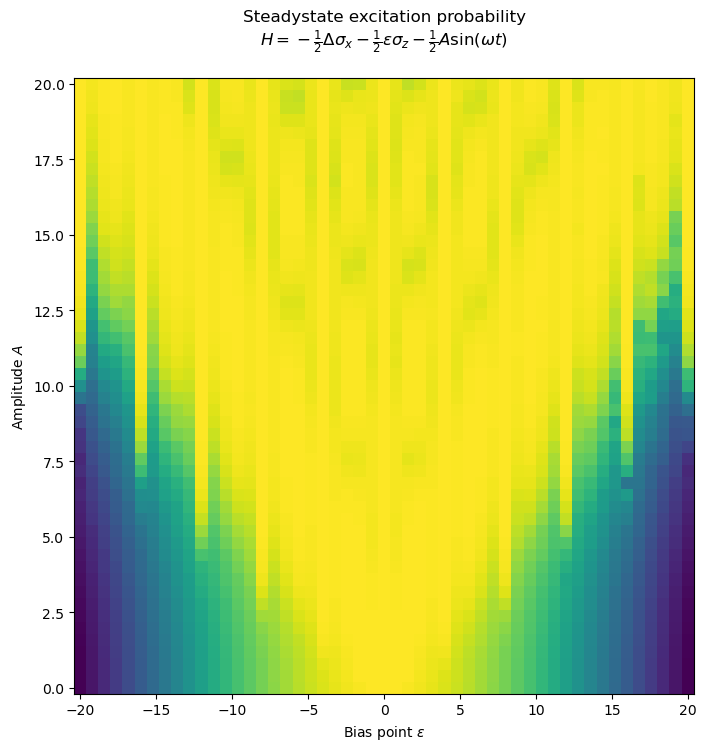

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

A_mat, eps_mat = np.meshgrid(A_list / (2 * np.pi), eps_list / (2 * np.pi))

ax.pcolor(eps_mat, A_mat, p_mat, shading="auto")
ax.set_xlabel(r"Bias point $\epsilon$")
ax.set_ylabel(r"Amplitude $A$")
ax.set_title(
    "Steadystate excitation probability\n"
    + r"$H = -\frac{1}{2}\Delta\sigma_x -\frac{1}{2}\epsilon\sigma_z -"
    + r"\frac{1}{2}A\sin(\omega t)$"
    + "\n"
);

## Versions

In [7]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.6
Numpy Version:      1.26.4
Scipy Version:      1.12.0
Cython Version:     0.29.37
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     4
BLAS Info:          Generic
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v4/lib/python3.10/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex refer